In [32]:
#Data
#Ascomycota Regions Information
'D:/Users/ernes/Documents/1KCL/Zelezniak/DeepExpressionWorking/2018_11_26/data_combined_df_output/Ascomycota.regions.csv'
#Which Regions Belong to Which Ascomycota Species
'D:/Users/ernes/Documents/1KCL/Zelezniak/DeepExpressionWorking/2018_11_26/data_combined_df_output/species_rows_from_index.csv'
#Saccharomyces Regions
'D:/Users/ernes/Documents/1KCL/Zelezniak/Data1/Saccharomyces_cerevisiae.R64-1-1.regions.csv'

'D:/Users/ernes/Documents/1KCL/Zelezniak/Data1/Saccharomyces_cerevisiae.R64-1-1.regions.csv'

In [33]:
import pandas as pd
import numpy as np

# Load the original DataFrame as before
df = pd.read_csv('D:/Users/ernes/Documents/1KCL/Zelezniak/DeepExpressionWorking/2018_11_26/data_combined_df_output/species_rows_from_index.csv')
df.columns = ['_'.join(col.split('_')[:2]) for col in df.columns]
df = df.replace([np.inf, -np.inf, np.nan], -1)

#Convert all data to integer type to remove .0
for col in df.columns:
    df[col] = df[col].astype(float).astype(int)

# Load the new CSV file
regions_df = pd.read_csv('D:/Users/ernes/Documents/1KCL/Zelezniak/DeepExpressionWorking/2018_11_26/data_combined_df_output/Ascomycota.regions.csv', delimiter=';')

# Create new dataframes
dataframe_names = ["prom_full_list", "term_full_list", "cds_len", "5utr_len", "3utr_len"]
new_dataframes = {name: df.copy() for name in dataframe_names}

# Replace each value in the new dataframes with the corresponding value from the new CSV file, ignoring -1 values
for df_name in new_dataframes.keys():
    new_dataframes[df_name] = new_dataframes[df_name].applymap(lambda x: regions_df.at[x, df_name] if x in regions_df.index and x != -1 else np.nan)
    
for df_name in new_dataframes.keys():
    new_dataframes[df_name] = new_dataframes[df_name].drop(new_dataframes[df_name].columns[0], axis=1)

In [34]:
import pandas as pd
import numpy as np

# Load the species rows CSV file
species_rows_file = 'D:/Users/ernes/Documents/1KCL/Zelezniak/DeepExpressionWorking/2018_11_26/data_combined_df_output/species_rows_from_csv.csv'
species_rows_df = pd.read_csv(species_rows_file, header=None)
species_rows = species_rows_df.iloc[0].tolist()

# Load the predictions from the npy file
pred_file = 'D:/Users/ernes/Documents/1KCL/Zelezniak/DeepExpressionWorking/2018_11_26/gfp_data_combined_output/GFP_Ascomycota_pred.npy'
pred_array = np.load(pred_file)

# Create a dictionary using species names as keys and data points as values
pred_dict = {species_rows[i]: pred_array[i] for i in range(len(species_rows))}

# Print the structure of the dictionary
for species, values in pred_dict.items():
    print(species, values)


Aaosphaeria_arxii_cbs_175_79_gca_010015735.Aaoar1.56 [9.86516]
Amniculicola_lignicola_cbs_123094_gca_010015725.Amnli1.56 [8.702513]
Ampelomyces_quisqualis_gca_010094095.Ampqui1.56 [7.4766626]
Ascobolus_immersus_rn42_gca_003788565.Ascim1.56 [8.119959]
Ascodesmis_nigricans_gca_004786065.Ascni1.56 [8.272184]
Aspergillus_alliaceus_gca_009176365.Aspalli1.56 [8.907317]
Aspergillus_arachidicola_gca_009193545.Aspara19utr.56 [8.555887]
Aspergillus_avenaceus_gca_009193465.Aspave1.56 [8.8171425]
Aspergillus_bertholletiae_gca_009193595.Aspber1.56 [8.802487]
Aspergillus_caelatus_gca_009193585.Aspcae1.56 [9.230551]
Aspergillus_coremiiformis_gca_009193565.Aspcor1.56 [7.5443196]
Aspergillus_costaricaensis_cbs_115574_gca_003184835.Aspcos1.56 [7.9896393]
Aspergillus_fijiensis_cbs_313_89_gca_003184825.Aspfij1.56 [9.466606]
Aspergillus_homomorphus_cbs_101889_gca_003184865.Asphom1.56 [9.8761635]
Aspergillus_ibericus_cbs_121593_gca_003184845.Aspibe1.56 [9.027319]
Aspergillus_leporis_gca_009176345.Asplep1.56

In [35]:
import re

# Define a function to parse the elements
def parse_element(element):
    if isinstance(element, str):  # Check if the element is a string
        numbers = re.findall(r'\d+', element)  # Extract all numbers
        if len(numbers) == 2:  # Check if we have two numbers
            return int(numbers[1]) - int(numbers[0])  # Subtract the first from the second
    return np.nan  # Return NaN for elements that can't be parsed

# Apply the function to each element of prom_full_list
new_dataframes['prom_full_list'] = new_dataframes['prom_full_list'].applymap(parse_element)
new_dataframes['term_full_list'] = new_dataframes['term_full_list'].applymap(parse_element)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Load the CSV file
saccharomyces_df = pd.read_csv('D:/Users/ernes/Documents/1KCL/Zelezniak/Data1/Saccharomyces_cerevisiae.R64-1-1.regions.csv', delimiter=';')

# Remove tab characters from column names
saccharomyces_df.columns = saccharomyces_df.columns.str.replace('\t', '')

# Extract the columns you're interested in
saccharomyces_data = {
    "cds_len": saccharomyces_df['cds_len'],
    "5utr_len": saccharomyces_df['5utr_len'],
    "3utr_len": saccharomyces_df['3utr_len']
}

In [37]:
# Remove rows where '5utr_len' or '3utr_len' is 3 or less
saccharomyces_df = saccharomyces_df[(saccharomyces_df['5utr_len'] > 3) & (saccharomyces_df['3utr_len'] > 3)]

# Extract the columns you're interested in
saccharomyces_data = {
    "cds_len": saccharomyces_df['cds_len'],
    "5utr_len": saccharomyces_df['5utr_len'],
    "3utr_len": saccharomyces_df['3utr_len']
}

In [38]:
# Define the DataFrame names we are interested in
dfs_of_interest = ['cds_len', '5utr_len', '3utr_len']

# Add Saccharomyces cerevisiae data to the desired dataframes
for df_name in dfs_of_interest:
    new_dataframes[df_name]['Saccharomyces cerevisiae'] = saccharomyces_data[df_name]

In [39]:
# Check if 'Saccharomyces cerevisiae' is in the dataframe columns
for df_name in ['cds_len', '5utr_len', '3utr_len']:
    if 'Saccharomyces cerevisiae' in new_dataframes[df_name].columns:
        print(f"'Saccharomyces cerevisiae' found in {df_name} DataFrame.")
    else:
        print(f"'Saccharomyces cerevisiae' NOT found in {df_name} DataFrame.")

'Saccharomyces cerevisiae' found in cds_len DataFrame.
'Saccharomyces cerevisiae' found in 5utr_len DataFrame.
'Saccharomyces cerevisiae' found in 3utr_len DataFrame.


In [40]:
# Reorder the columns
cols = new_dataframes['cds_len'].columns.tolist()
cols.insert(0, cols.pop(cols.index('Saccharomyces cerevisiae')))

# Apply the new order
for df_name in dfs_of_interest:
    new_dataframes[df_name] = new_dataframes[df_name][cols]

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

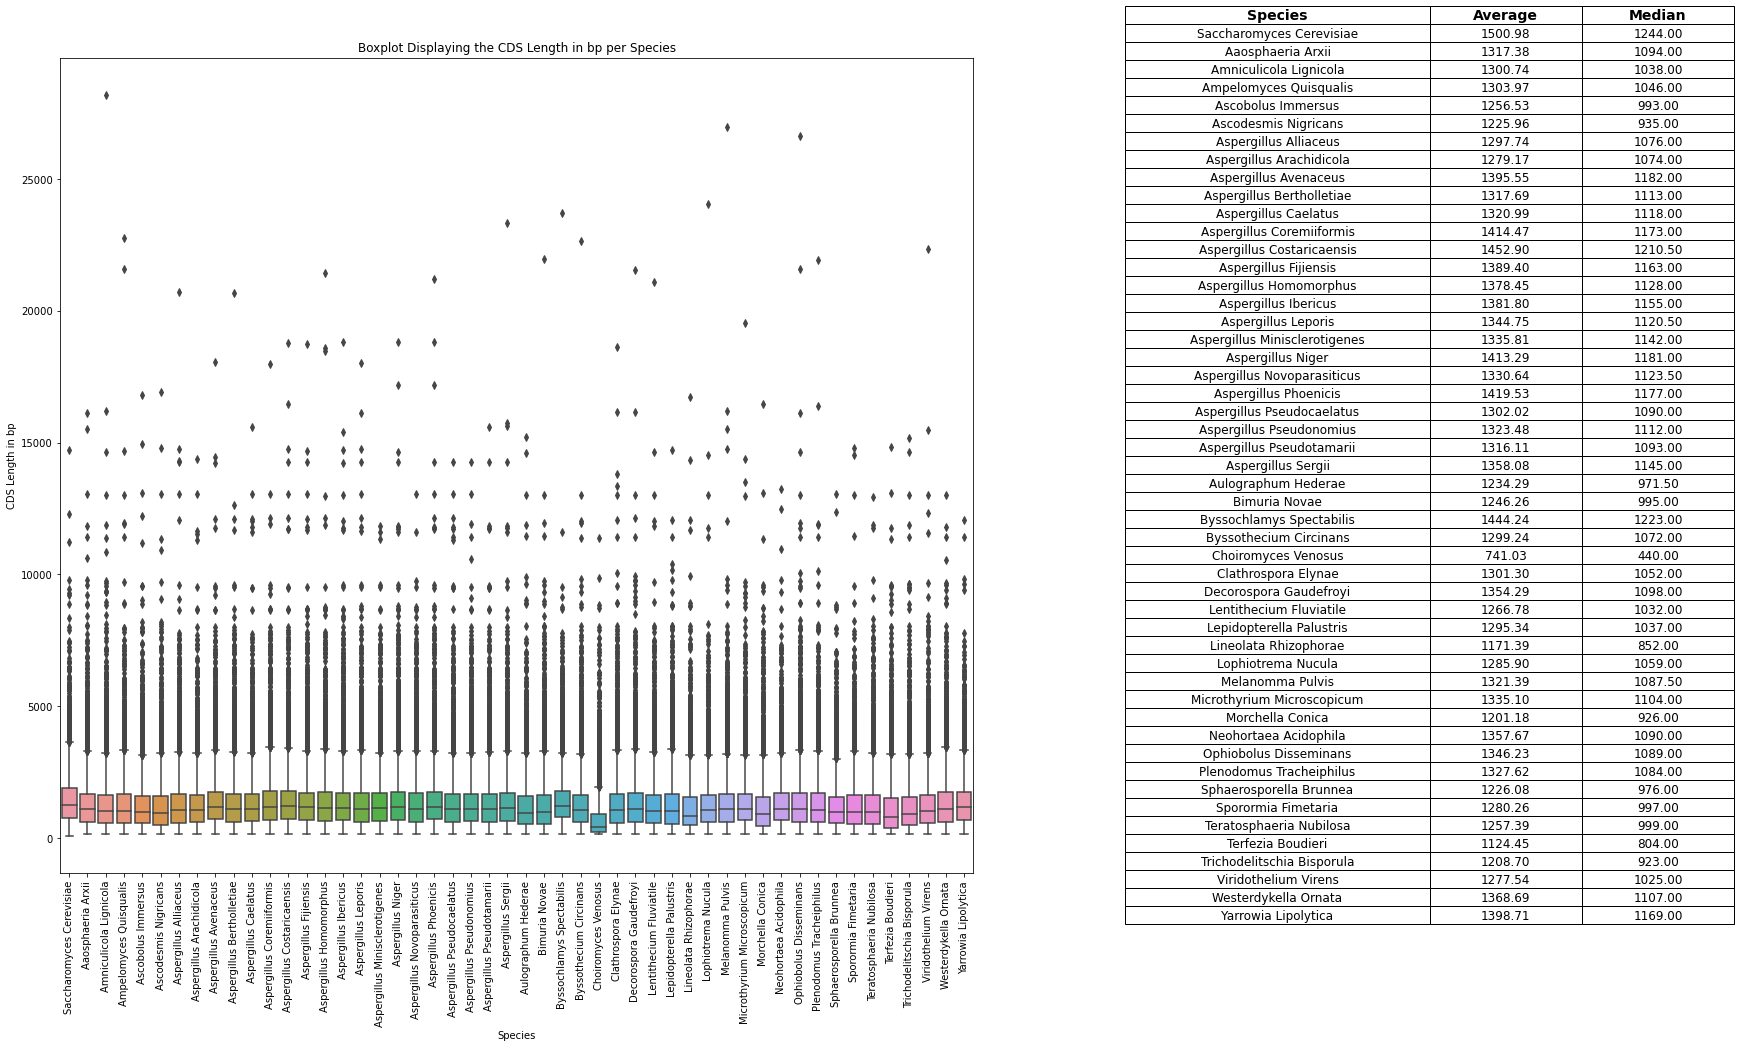

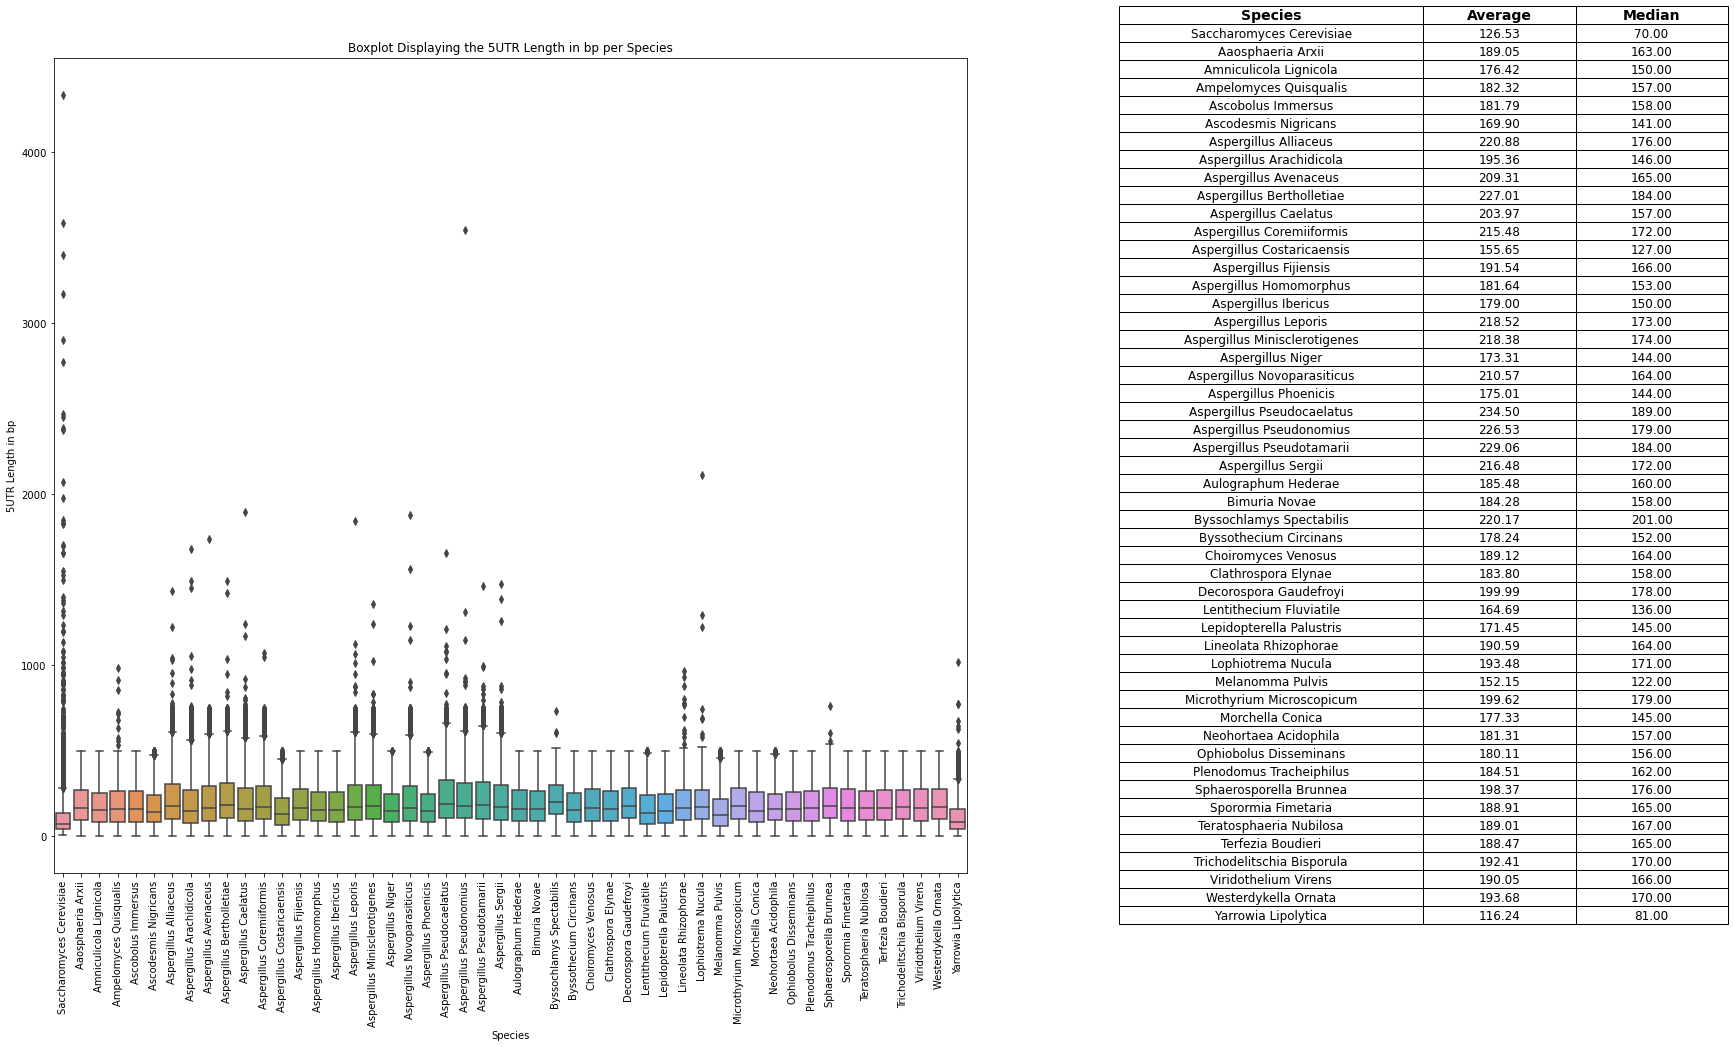

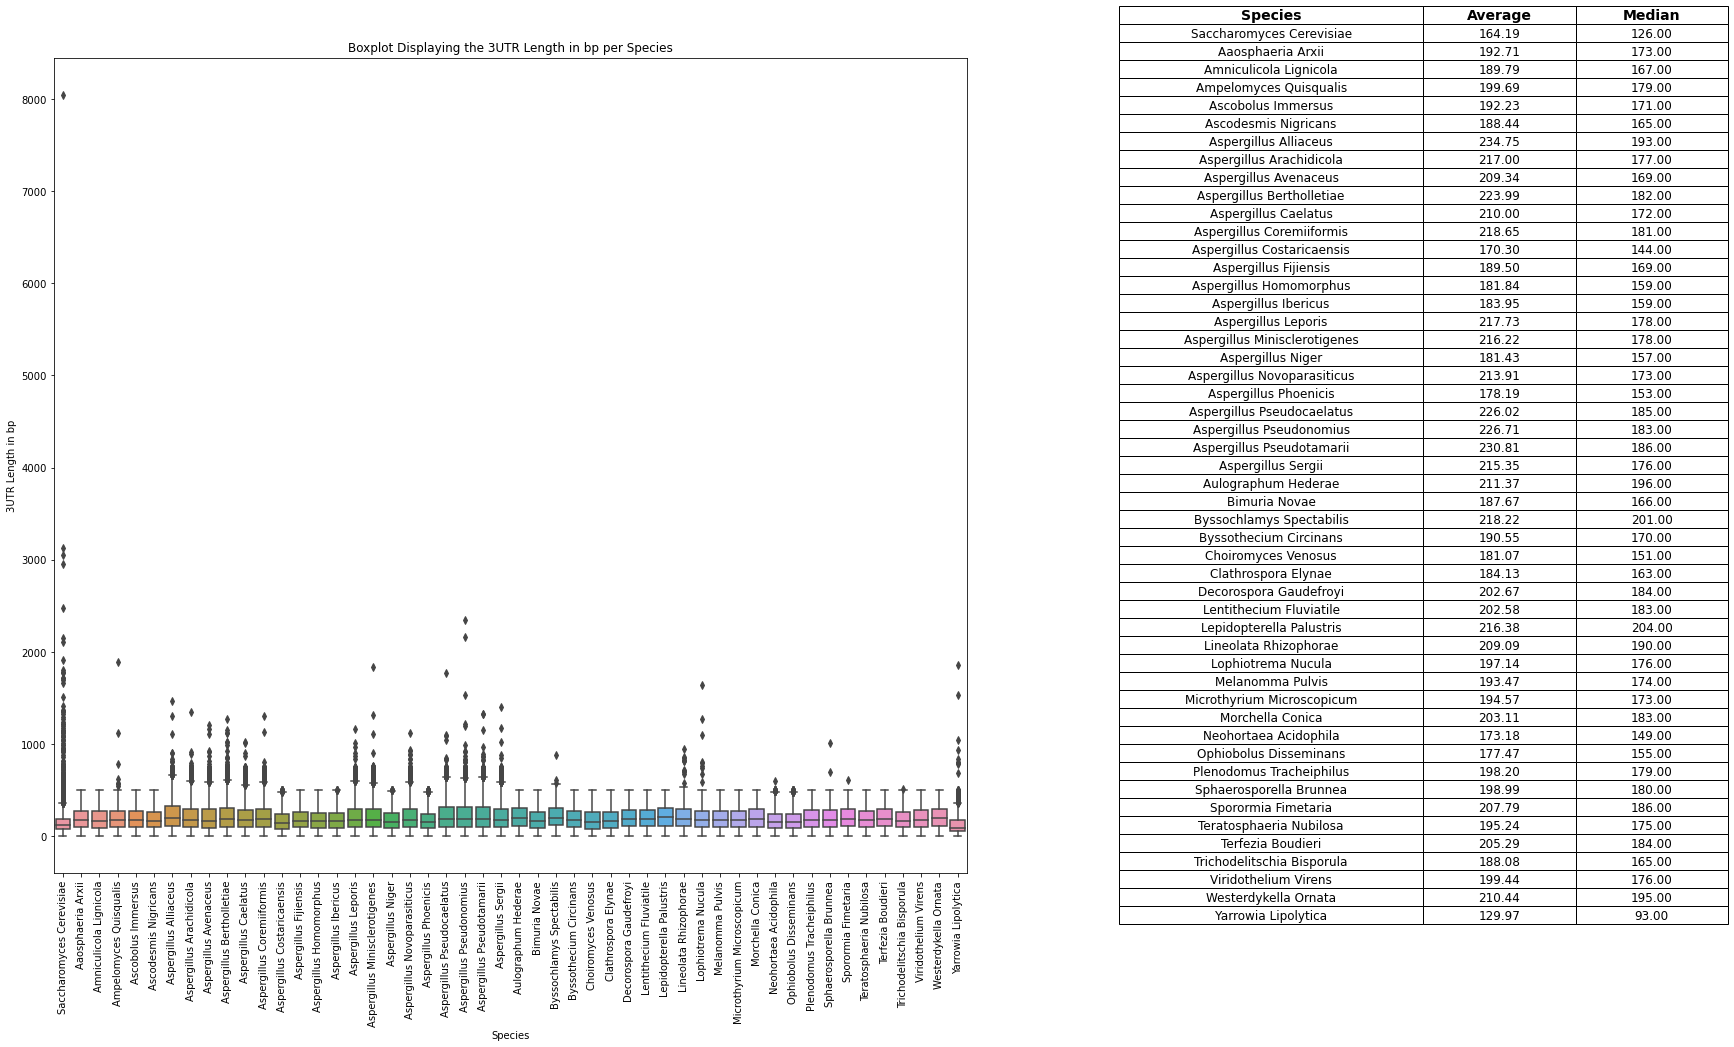

In [42]:
# Create a list of the columns (species) you're interested in
species = list(new_dataframes['cds_len'].columns)

# Generate boxplots for each species for each DataFrame
for df_name in ['cds_len', '5utr_len', '3utr_len']:
    # Define grid spec
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2])  # Adjust the width ratio to make the table wider
    fig = plt.figure(figsize=(30, 15))  # Adjust figure size here. For example, (30, 15) will make a wider and taller figure.

    # Create axis for boxplot
    ax = plt.subplot(gs[0])
    df = new_dataframes[df_name]
    melted_df = df.melt(value_vars=species, var_name='Species', value_name=df_name)
    
    # Update species names: replace underscore with space, capitalize every word
    melted_df['Species'] = melted_df['Species'].str.replace('_', ' ').str.title()

    # Create boxplot
    sns.boxplot(x='Species', y=df_name, data=melted_df, ax=ax)
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability

    # Set title and ylabel
    title_map = {'cds_len': 'CDS Length in bp', '5utr_len': '5UTR Length in bp', '3utr_len': '3UTR Length in bp'}
    ax.set_title(f"Boxplot Displaying the {title_map[df_name]} per Species")
    ax.set_ylabel(title_map[df_name])

    # Create axis for table
    ax_table = plt.subplot(gs[1])
    ax_table.axis('tight')
    ax_table.axis('off')

    # Prepare average and median values as table
    cell_text = []
    for col in df.columns:
        cell_text.append([col.replace('_', ' ').title(), f"{df[col].mean():.2f}", f"{df[col].median():.2f}"])
    
    # Add a table on the right
    table = ax_table.table(cellText=cell_text, colLabels=['Species', 'Average', 'Median'], 
                           loc='center', colWidths=[0.5, 0.25, 0.25])  # Specify column widths

    # Set table style
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Increase font size
    table.scale(1, 1.5)  # Increase row height
    for (row, col), cell in table.get_celld().items():
        if (row == 0):  # If this is a header cell, make it bold
            cell.set_fontsize(14)
            cell.set_text_props(weight='bold', ha='center')
        else:  # Otherwise, make the font a bit smaller
            cell.set_fontsize(12)
            cell.set_text_props(ha='center')

    plt.show()


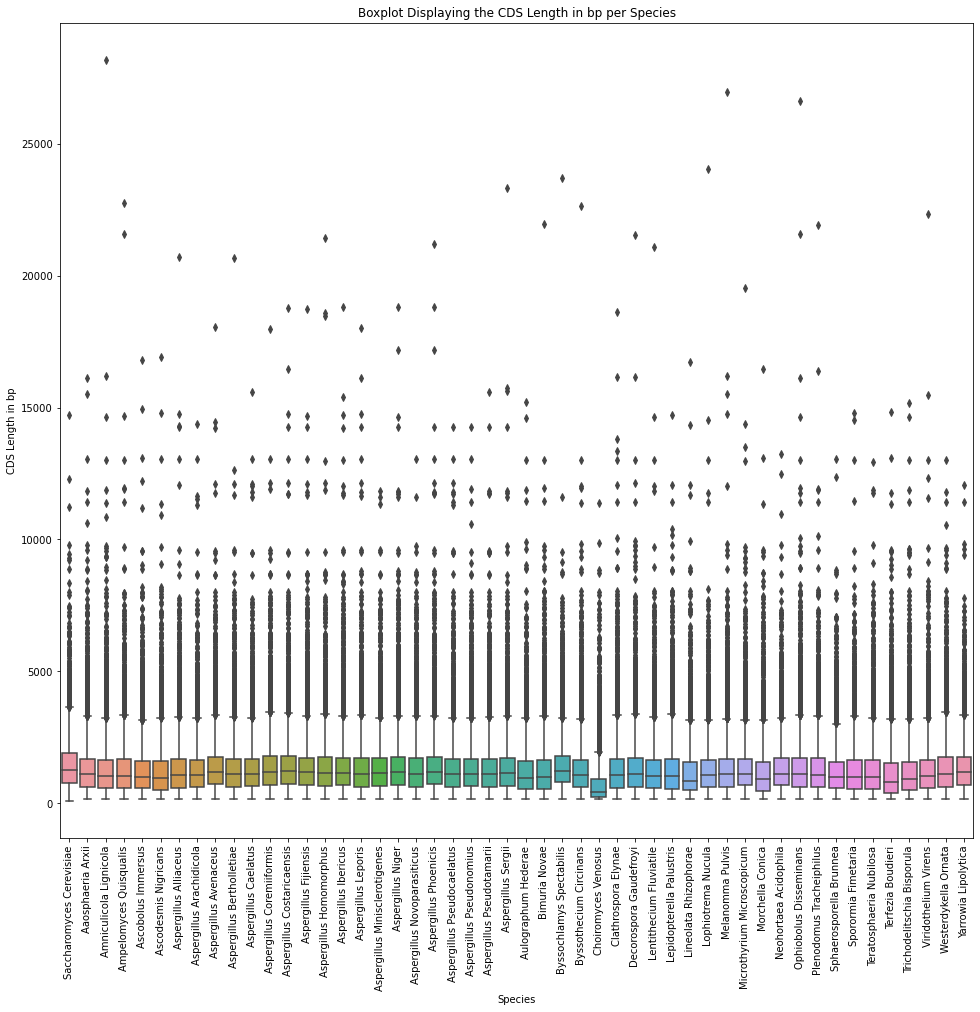

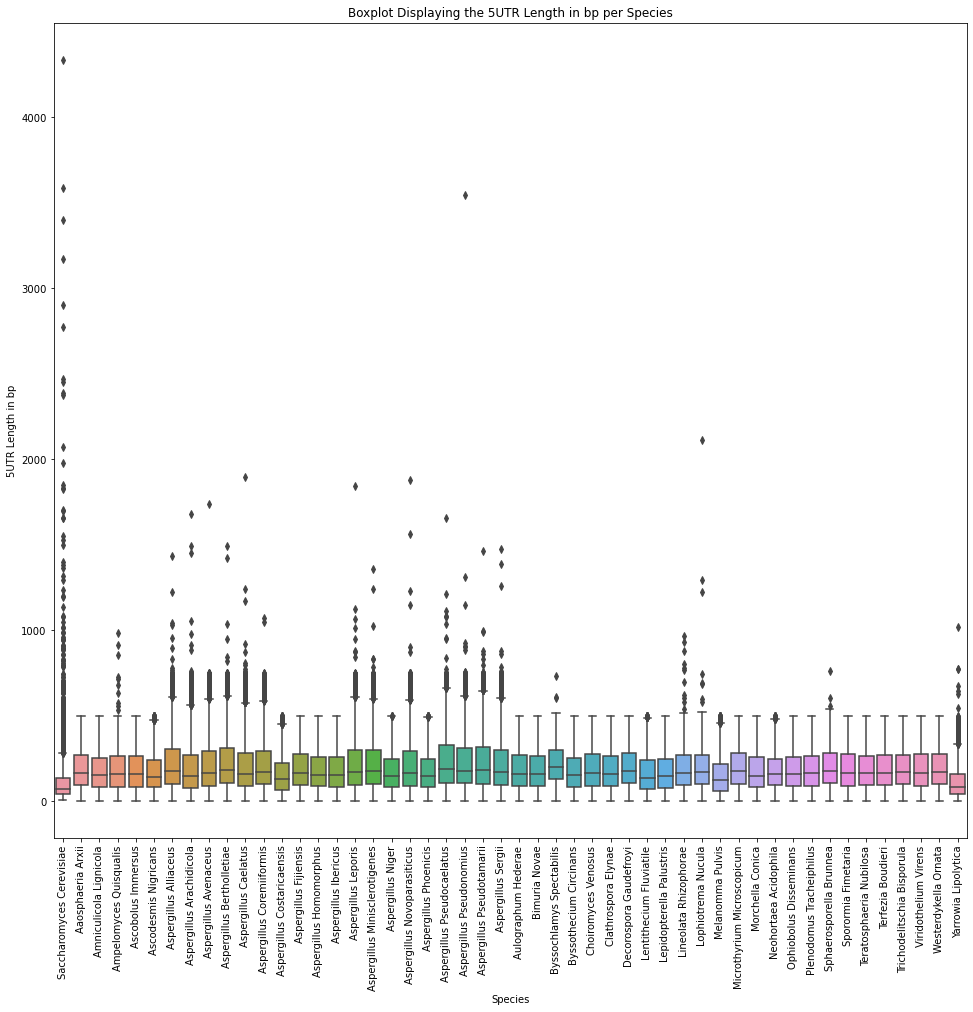

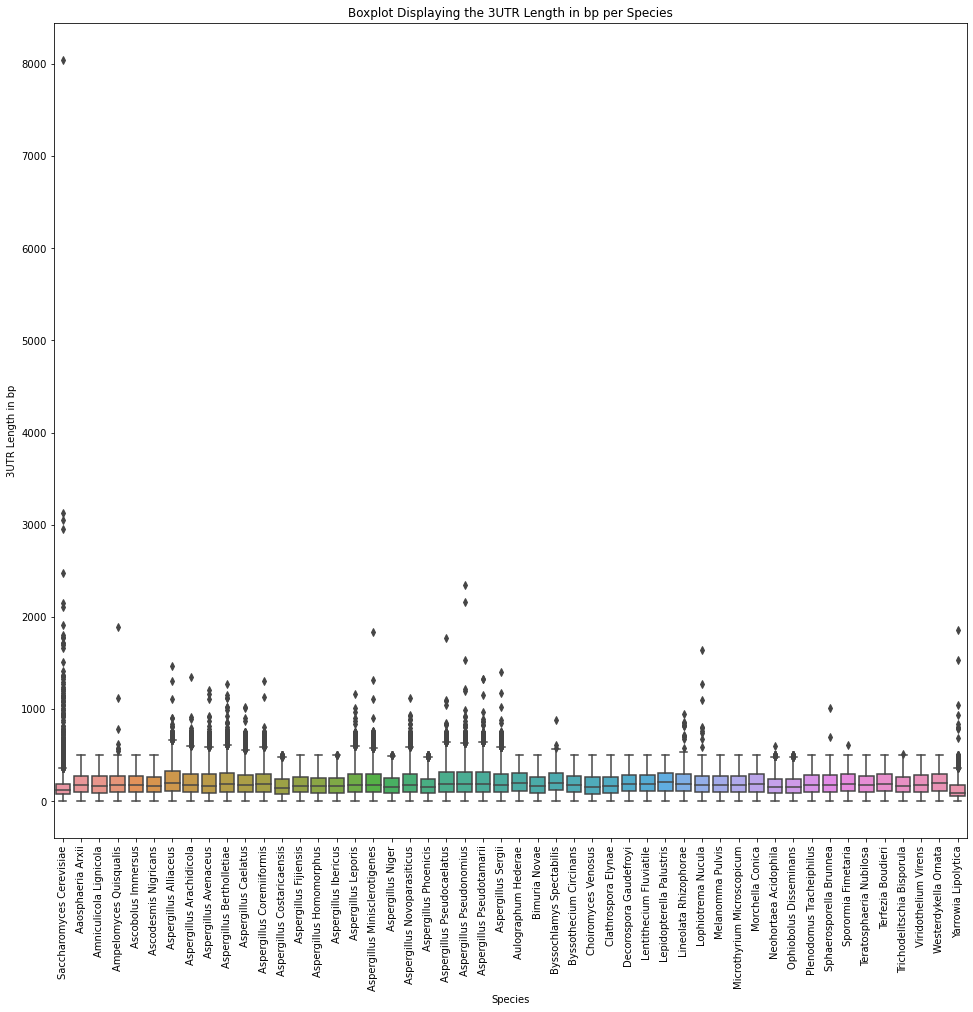

In [43]:
# Create a list of the columns (species) you're interested in
species = list(new_dataframes['cds_len'].columns)

# Generate boxplots for each species for each DataFrame
for df_name in ['cds_len', '5utr_len', '3utr_len']:
    # Define grid spec
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2])  # Adjust the width ratio to make the table wider
    fig = plt.figure(figsize=(30, 15))  # Adjust figure size here. For example, (30, 15) will make a wider and taller figure.

    # Create axis for boxplot
    ax = plt.subplot(gs[0])
    df = new_dataframes[df_name]
    melted_df = df.melt(value_vars=species, var_name='Species', value_name=df_name)
    
    # Update species names: replace underscore with space, capitalize every word
    melted_df['Species'] = melted_df['Species'].str.replace('_', ' ').str.title()

    # Create boxplot
    sns.boxplot(x='Species', y=df_name, data=melted_df, ax=ax)
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability

    # Set title and ylabel
    title_map = {'cds_len': 'CDS Length in bp', '5utr_len': '5UTR Length in bp', '3utr_len': '3UTR Length in bp'}
    ax.set_title(f"Boxplot Displaying the {title_map[df_name]} per Species")
    ax.set_ylabel(title_map[df_name])

    plt.show()


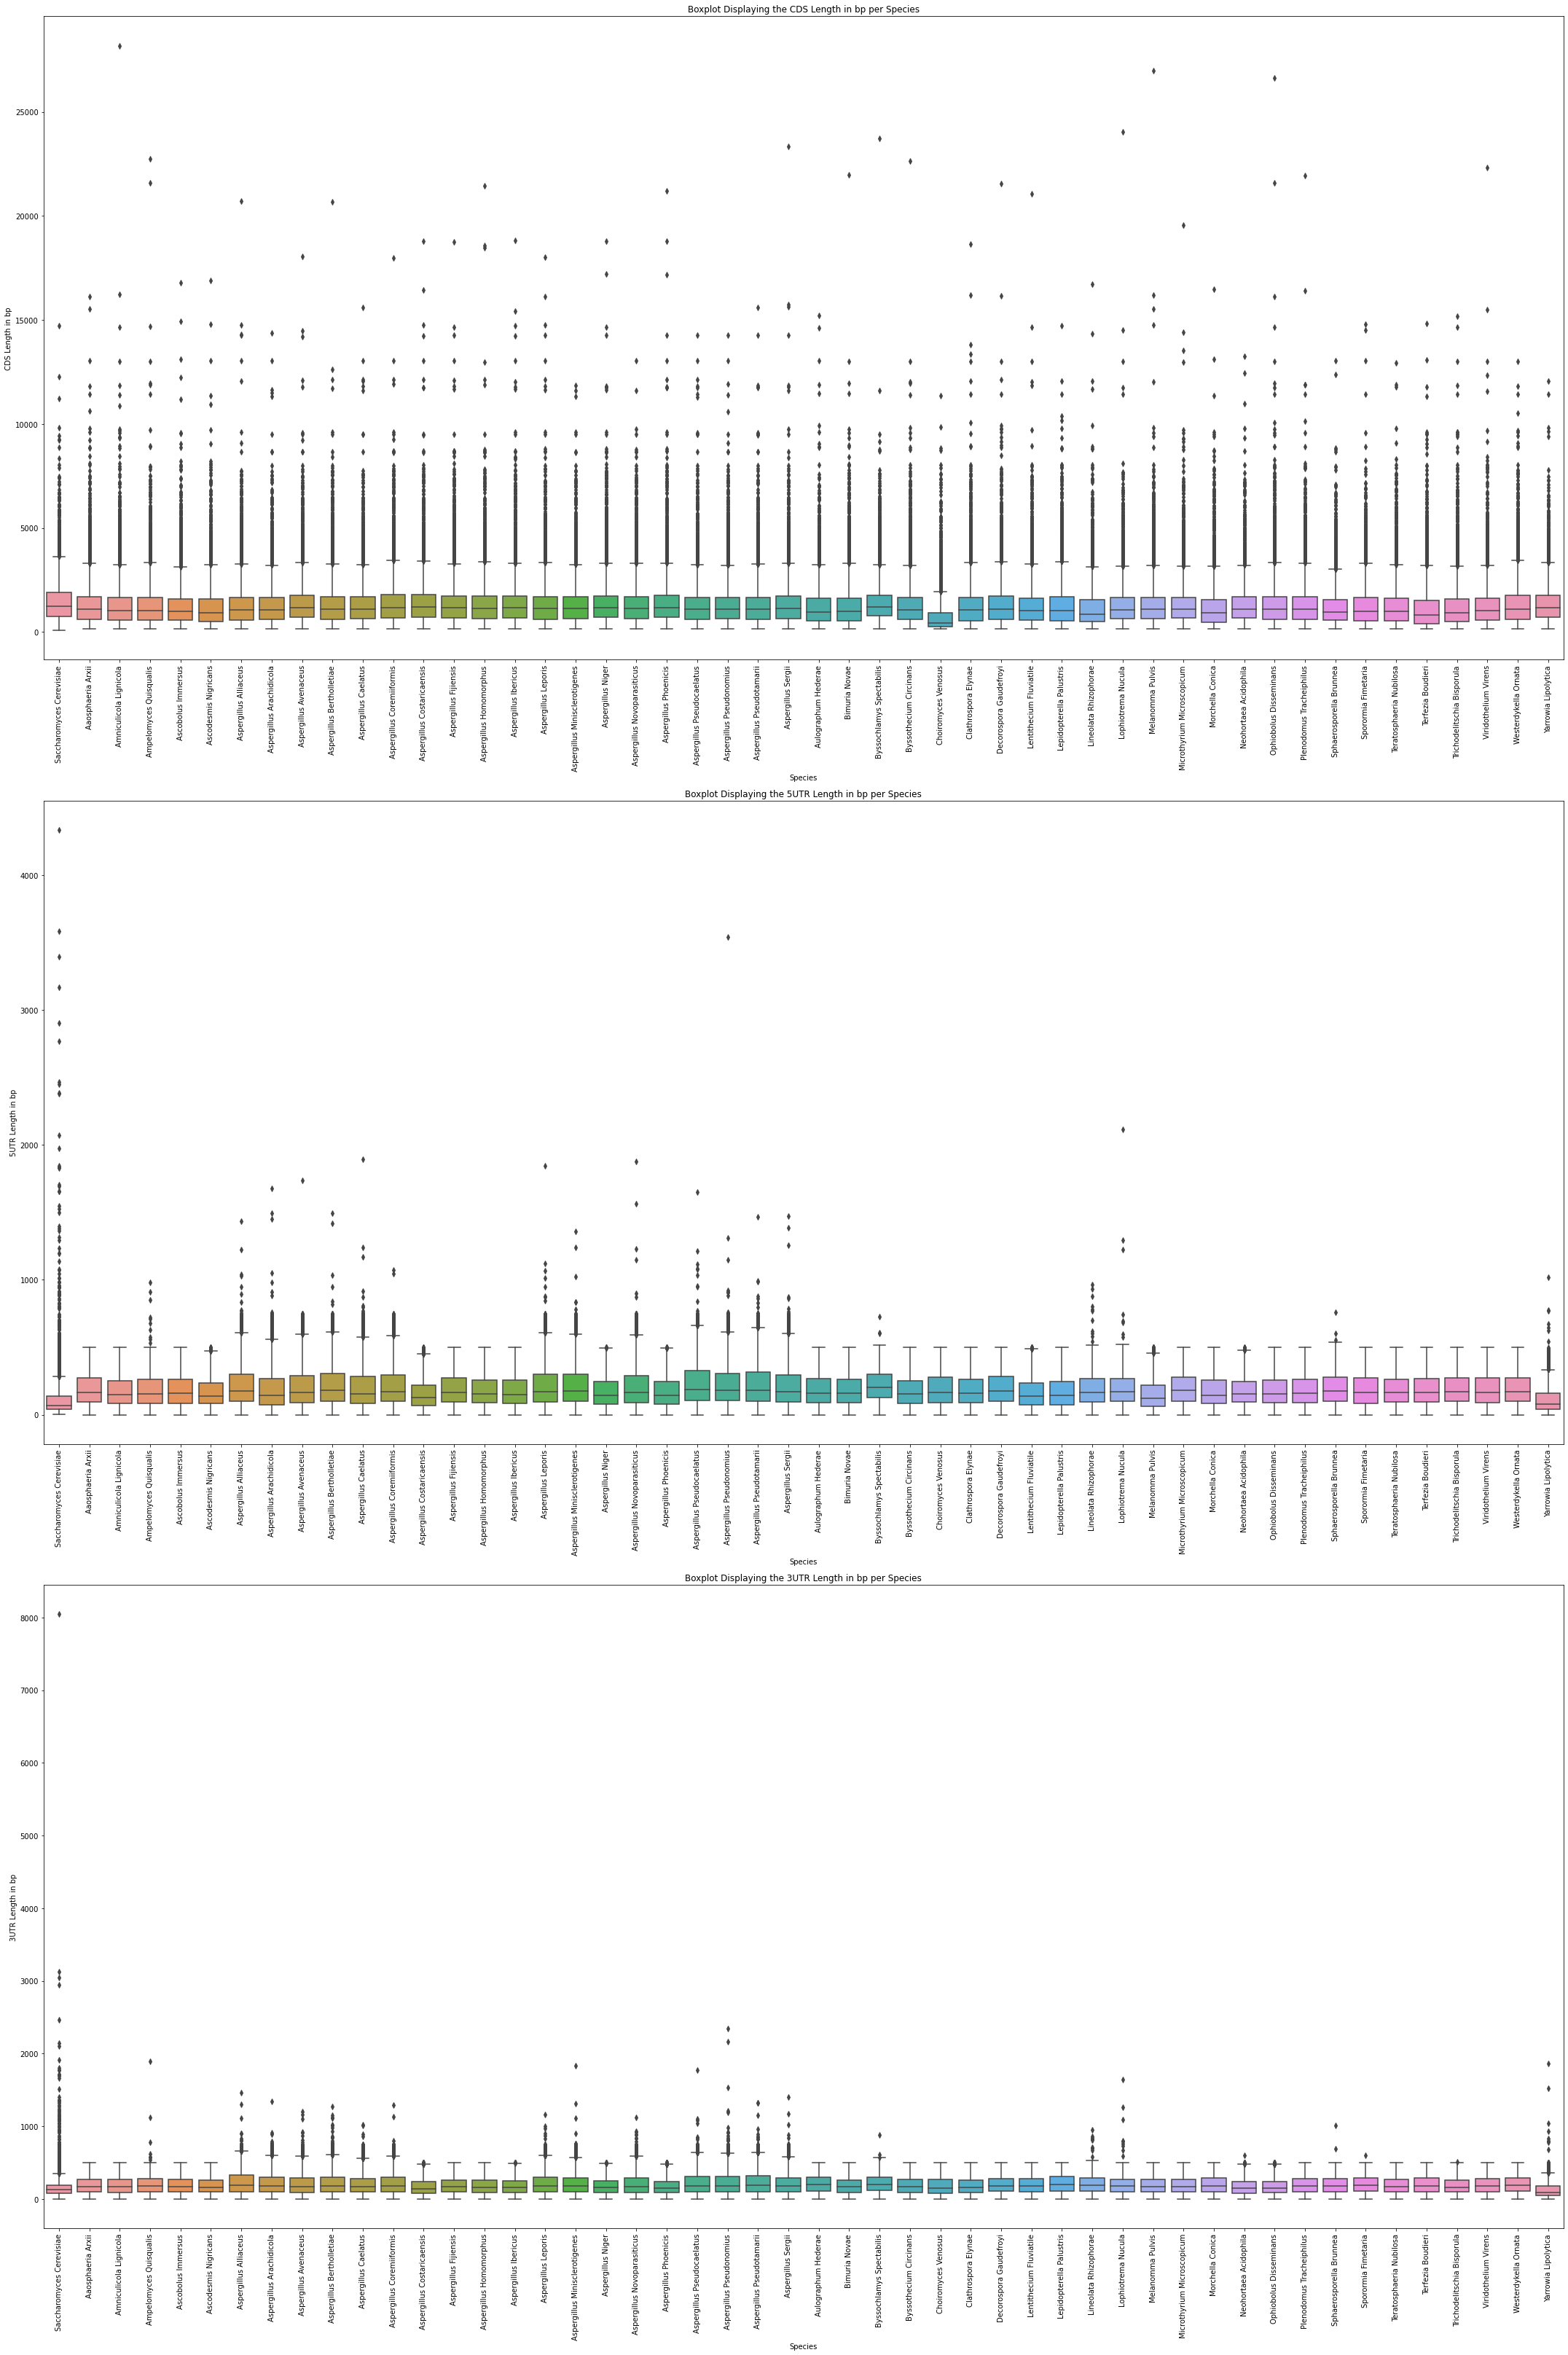

In [53]:
# Create a list of the columns (species) you're interested in
species = list(new_dataframes['cds_len'].columns)

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(30, 45))  # 3 rows for 3 boxplots

# Generate boxplots for each species for each DataFrame
for i, df_name in enumerate(['cds_len', '5utr_len', '3utr_len']):
    # Get current axis
    ax = axs[i]

    # Get DataFrame and melt it
    df = new_dataframes[df_name]
    melted_df = df.melt(value_vars=species, var_name='Species', value_name=df_name)
    
    # Update species names: replace underscore with space, capitalize every word
    melted_df['Species'] = melted_df['Species'].str.replace('_', ' ').str.title()

    # Create boxplot
    sns.boxplot(x='Species', y=df_name, data=melted_df, ax=ax)
    
    # Rotate x-axis labels for readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Set title and ylabel
    title_map = {'cds_len': 'CDS Length in bp', '5utr_len': '5UTR Length in bp', '3utr_len': '3UTR Length in bp'}
    ax.set_title(f"Boxplot Displaying the {title_map[df_name]} per Species")
    ax.set_ylabel(title_map[df_name])

# Show the figure with all subplots
plt.tight_layout()  # Adjusts subplot params so that subplots fit in the figure area
plt.show()


In [44]:
from scipy.stats import mannwhitneyu, shapiro, levene

for df_name in ['cds_len', '5utr_len', '3utr_len']:
    print(f"Statistics for {df_name}\n{'='*30}")
    
    df = new_dataframes[df_name]
    
    # Calculate statistics
    statistics = []
    for col in df.columns:
        # Exclude NaN values
        sample1 = df[col].dropna()
        sample2 = df['Saccharomyces cerevisiae'].dropna()
        
        # Compute Mann-Whitney U test
        statistic, pvalue_mannwhitneyu = mannwhitneyu(sample1, sample2, alternative='two-sided')
        
        # Perform Shapiro-Wilk test for normality
        _, pvalue_shapiro1 = shapiro(sample1)
        _, pvalue_shapiro2 = shapiro(sample2)
        
        # Perform Levene's test for equal variances
        _, pvalue_levene = levene(sample1, sample2)

        # Update species names: replace underscore with space, capitalize every word
        species_name = col.replace('_', ' ').title()
        
        # Append species, average, median and p-values to statistics
        statistics.append([species_name, f"{sample1.mean():.2f}", f"{sample1.median():.2f}", f"{pvalue_mannwhitneyu:.4f}", f"{pvalue_shapiro1:.4f}", f"{pvalue_shapiro2:.4f}", f"{pvalue_levene:.4f}"])
    
    # Create a DataFrame and display as a table
    df_statistics = pd.DataFrame(statistics, columns=['Species', 'Average', 'Median', 'P-value (Mann-Whitney U)', 'P-value (Shapiro-Wilk Sample 1)', 'P-value (Shapiro-Wilk Sample 2)', 'P-value (Levene)'])
    print(df_statistics.to_string(index=False))


Statistics for cds_len


D:\Users\ernes\Documents\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


                      Species Average  Median P-value (Mann-Whitney U) P-value (Shapiro-Wilk Sample 1) P-value (Shapiro-Wilk Sample 2) P-value (Levene)
     Saccharomyces Cerevisiae 1500.98 1244.00                   1.0000                          0.0000                          0.0000           1.0000
            Aaosphaeria Arxii 1317.38 1094.00                   0.0000                          0.0000                          0.0000           0.0001
       Amniculicola Lignicola 1300.74 1038.00                   0.0000                          0.0000                          0.0000           0.0015
       Ampelomyces Quisqualis 1303.97 1046.00                   0.0000                          0.0000                          0.0000           0.0792
           Ascobolus Immersus 1256.53  993.00                   0.0000                          0.0000                          0.0000           0.0000
         Ascodesmis Nigricans 1225.96  935.00                   0.0000                  

D:\Users\ernes\Documents\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


                      Species Average Median P-value (Mann-Whitney U) P-value (Shapiro-Wilk Sample 1) P-value (Shapiro-Wilk Sample 2) P-value (Levene)
     Saccharomyces Cerevisiae  126.53  70.00                   1.0000                          0.0000                          0.0000           1.0000
            Aaosphaeria Arxii  189.05 163.00                   0.0000                          0.0000                          0.0000           0.0000
       Amniculicola Lignicola  176.42 150.00                   0.0000                          0.0000                          0.0000           0.0000
       Ampelomyces Quisqualis  182.32 157.00                   0.0000                          0.0000                          0.0000           0.0000
           Ascobolus Immersus  181.79 158.00                   0.0000                          0.0000                          0.0000           0.0000
         Ascodesmis Nigricans  169.90 141.00                   0.0000                         

D:\Users\ernes\Documents\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


                      Species Average Median P-value (Mann-Whitney U) P-value (Shapiro-Wilk Sample 1) P-value (Shapiro-Wilk Sample 2) P-value (Levene)
     Saccharomyces Cerevisiae  164.19 126.00                   1.0000                          0.0000                          0.0000           1.0000
            Aaosphaeria Arxii  192.71 173.00                   0.0000                          0.0000                          0.0000           0.0000
       Amniculicola Lignicola  189.79 167.00                   0.0000                          0.0000                          0.0000           0.0000
       Ampelomyces Quisqualis  199.69 179.00                   0.0000                          0.0000                          0.0000           0.0001
           Ascobolus Immersus  192.23 171.00                   0.0000                          0.0000                          0.0000           0.0001
         Ascodesmis Nigricans  188.44 165.00                   0.0000                         

In [45]:
from scipy.stats import mannwhitneyu, shapiro, levene

for df_name in ['cds_len', '5utr_len', '3utr_len']:
    print(f"Statistics for {df_name}\n{'='*30}")
    
    df = new_dataframes[df_name]
    
    # Calculate statistics
    statistics = []
    for col in df.columns:
        # Exclude NaN values
        sample1 = df[col].dropna()
        sample2 = df['Saccharomyces cerevisiae'].dropna()
        
        # Compute Mann-Whitney U test
        statistic, pvalue_mannwhitneyu = mannwhitneyu(sample1, sample2, alternative='two-sided')
        
        # Perform Shapiro-Wilk test for normality
        _, pvalue_shapiro1 = shapiro(sample1)
        _, pvalue_shapiro2 = shapiro(sample2)
        
        # Perform Levene's test for equal variances
        _, pvalue_levene = levene(sample1, sample2)

        # Update species names: replace underscore with space, capitalize every word
        species_name = col.replace('_', ' ').title()
        
        # Append species, average, median and p-values to statistics
        statistics.append([species_name, f"{sample1.mean():.2f}", f"{sample1.median():.2f}", f"{pvalue_mannwhitneyu:.4f}", f"{pvalue_shapiro1:.4f}", f"{pvalue_shapiro2:.4f}", f"{pvalue_levene:.4f}"])
    
    # Create a DataFrame and display as a table
    df_statistics = pd.DataFrame(statistics, columns=['Species', 'Average', 'Median', 'P-value (Mann-Whitney U)', 'P-value (Shapiro-Wilk Sample 1)', 'P-value (Shapiro-Wilk Sample 2)', 'P-value (Levene)'])
    print(df_statistics.to_string(index=False))

Statistics for cds_len


D:\Users\ernes\Documents\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


                      Species Average  Median P-value (Mann-Whitney U) P-value (Shapiro-Wilk Sample 1) P-value (Shapiro-Wilk Sample 2) P-value (Levene)
     Saccharomyces Cerevisiae 1500.98 1244.00                   1.0000                          0.0000                          0.0000           1.0000
            Aaosphaeria Arxii 1317.38 1094.00                   0.0000                          0.0000                          0.0000           0.0001
       Amniculicola Lignicola 1300.74 1038.00                   0.0000                          0.0000                          0.0000           0.0015
       Ampelomyces Quisqualis 1303.97 1046.00                   0.0000                          0.0000                          0.0000           0.0792
           Ascobolus Immersus 1256.53  993.00                   0.0000                          0.0000                          0.0000           0.0000
         Ascodesmis Nigricans 1225.96  935.00                   0.0000                  

D:\Users\ernes\Documents\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


                      Species Average Median P-value (Mann-Whitney U) P-value (Shapiro-Wilk Sample 1) P-value (Shapiro-Wilk Sample 2) P-value (Levene)
     Saccharomyces Cerevisiae  126.53  70.00                   1.0000                          0.0000                          0.0000           1.0000
            Aaosphaeria Arxii  189.05 163.00                   0.0000                          0.0000                          0.0000           0.0000
       Amniculicola Lignicola  176.42 150.00                   0.0000                          0.0000                          0.0000           0.0000
       Ampelomyces Quisqualis  182.32 157.00                   0.0000                          0.0000                          0.0000           0.0000
           Ascobolus Immersus  181.79 158.00                   0.0000                          0.0000                          0.0000           0.0000
         Ascodesmis Nigricans  169.90 141.00                   0.0000                         

D:\Users\ernes\Documents\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


                      Species Average Median P-value (Mann-Whitney U) P-value (Shapiro-Wilk Sample 1) P-value (Shapiro-Wilk Sample 2) P-value (Levene)
     Saccharomyces Cerevisiae  164.19 126.00                   1.0000                          0.0000                          0.0000           1.0000
            Aaosphaeria Arxii  192.71 173.00                   0.0000                          0.0000                          0.0000           0.0000
       Amniculicola Lignicola  189.79 167.00                   0.0000                          0.0000                          0.0000           0.0000
       Ampelomyces Quisqualis  199.69 179.00                   0.0000                          0.0000                          0.0000           0.0001
           Ascobolus Immersus  192.23 171.00                   0.0000                          0.0000                          0.0000           0.0001
         Ascodesmis Nigricans  188.44 165.00                   0.0000                         

In [46]:
from scipy.stats import wilcoxon

# Calculate group median for each DataFrame
group_medians = {df_name: new_dataframes[df_name].median().median() for df_name in ['cds_len', '5utr_len', '3utr_len']}

for df_name in ['cds_len', '5utr_len', '3utr_len']:
    print(f"Statistics for {df_name}\n{'='*30}")
    
    df = new_dataframes[df_name]
    group_median = group_medians[df_name]
    
    # Calculate statistics
    statistics = []
    for col in df.columns:
        # Exclude NaN values
        sample = df[col].dropna()
        
        # Compute Wilcoxon signed-rank test
        _, pvalue_greater = wilcoxon(sample - group_median, alternative='greater')  # One-tailed test
        _, pvalue_two_sided = wilcoxon(sample - group_median, alternative='two-sided')  # Two-tailed test

        # Update species names: replace underscore with space, capitalize every word
        species_name = col.replace('_', ' ').title()
        
        # Append species, average, median and p-values to statistics
        statistics.append([species_name, f"{sample.mean():.2f}", f"{sample.median():.2f}", f"{pvalue_greater:.4f}", f"{pvalue_two_sided:.4f}"])
    
    # Create a DataFrame and display as a table
    df_statistics = pd.DataFrame(statistics, columns=['Species', 'Average', 'Median', 'P-value (greater)', 'P-value (two-sided)'])
    print(df_statistics.to_string(index=False))


Statistics for cds_len
                      Species Average  Median P-value (greater) P-value (two-sided)
     Saccharomyces Cerevisiae 1500.98 1244.00            0.0000              0.0000
            Aaosphaeria Arxii 1317.38 1094.00            0.0000              0.0000
       Amniculicola Lignicola 1300.74 1038.00            0.0000              0.0000
       Ampelomyces Quisqualis 1303.97 1046.00            0.0000              0.0000
           Ascobolus Immersus 1256.53  993.00            0.2001              0.4002
         Ascodesmis Nigricans 1225.96  935.00            0.9986              0.0028
        Aspergillus Alliaceus 1297.74 1076.00            0.0000              0.0000
     Aspergillus Arachidicola 1279.17 1074.00            0.0000              0.0000
        Aspergillus Avenaceus 1395.55 1182.00            0.0000              0.0000
    Aspergillus Bertholletiae 1317.69 1113.00            0.0000              0.0000
         Aspergillus Caelatus 1320.99 1118.00        

                      Species Average Median P-value (greater) P-value (two-sided)
     Saccharomyces Cerevisiae  164.19 126.00            1.0000              0.0000
            Aaosphaeria Arxii  192.71 173.00            0.0000              0.0000
       Amniculicola Lignicola  189.79 167.00            0.0001              0.0001
       Ampelomyces Quisqualis  199.69 179.00            0.0000              0.0000
           Ascobolus Immersus  192.23 171.00            0.0000              0.0000
         Ascodesmis Nigricans  188.44 165.00            0.0041              0.0082
        Aspergillus Alliaceus  234.75 193.00            0.0000              0.0000
     Aspergillus Arachidicola  217.00 177.00            0.0000              0.0000
        Aspergillus Avenaceus  209.34 169.00            0.0000              0.0000
    Aspergillus Bertholletiae  223.99 182.00            0.0000              0.0000
         Aspergillus Caelatus  210.00 172.00            0.0000              0.0000
    

Statistics for cds_len
                      Species Average  Median P-value (greater) P-value (two-sided)
     Saccharomyces Cerevisiae 1500.98 1244.00            0.0000              0.0000
            Aaosphaeria Arxii 1317.38 1094.00            0.0000              0.0000
       Amniculicola Lignicola 1300.74 1038.00            0.0000              0.0000
       Ampelomyces Quisqualis 1303.97 1046.00            0.0000              0.0000
           Ascobolus Immersus 1256.53  993.00            0.2001              0.4002
         Ascodesmis Nigricans 1225.96  935.00            0.9986              0.0028
        Aspergillus Alliaceus 1297.74 1076.00            0.0000              0.0000
     Aspergillus Arachidicola 1279.17 1074.00            0.0000              0.0000
        Aspergillus Avenaceus 1395.55 1182.00            0.0000              0.0000
    Aspergillus Bertholletiae 1317.69 1113.00            0.0000              0.0000
         Aspergillus Caelatus 1320.99 1118.00        

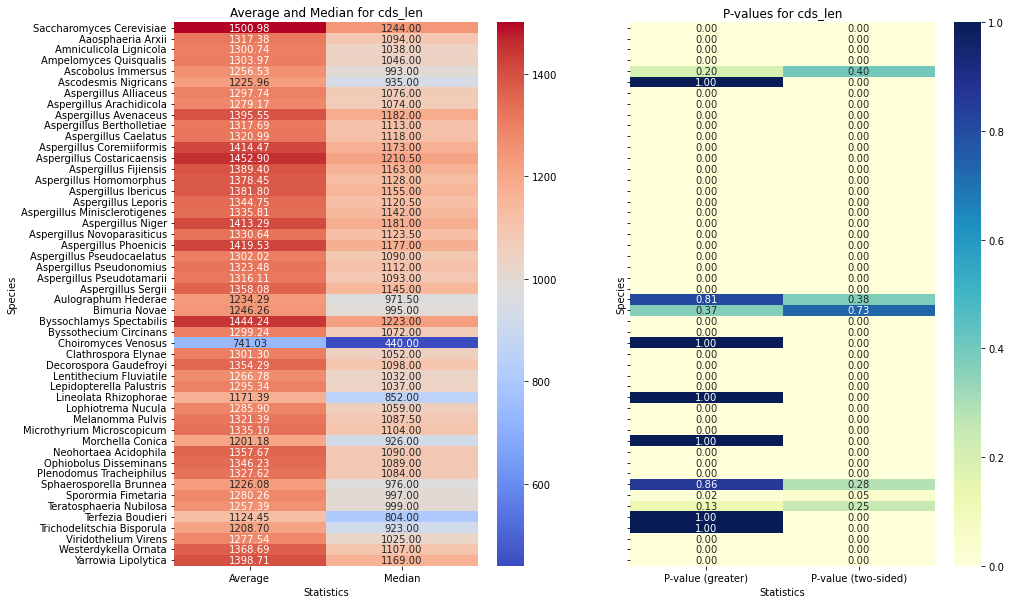

Statistics for 5utr_len
                      Species Average Median P-value (greater) P-value (two-sided)
     Saccharomyces Cerevisiae  126.53  70.00            1.0000              0.0000
            Aaosphaeria Arxii  189.05 163.00            0.0000              0.0000
       Amniculicola Lignicola  176.42 150.00            0.0133              0.0267
       Ampelomyces Quisqualis  182.32 157.00            0.0000              0.0000
           Ascobolus Immersus  181.79 158.00            0.0000              0.0000
         Ascodesmis Nigricans  169.90 141.00            0.9968              0.0064
        Aspergillus Alliaceus  220.88 176.00            0.0000              0.0000
     Aspergillus Arachidicola  195.36 146.00            0.0000              0.0000
        Aspergillus Avenaceus  209.31 165.00            0.0000              0.0000
    Aspergillus Bertholletiae  227.01 184.00            0.0000              0.0000
         Aspergillus Caelatus  203.97 157.00            0.0000 

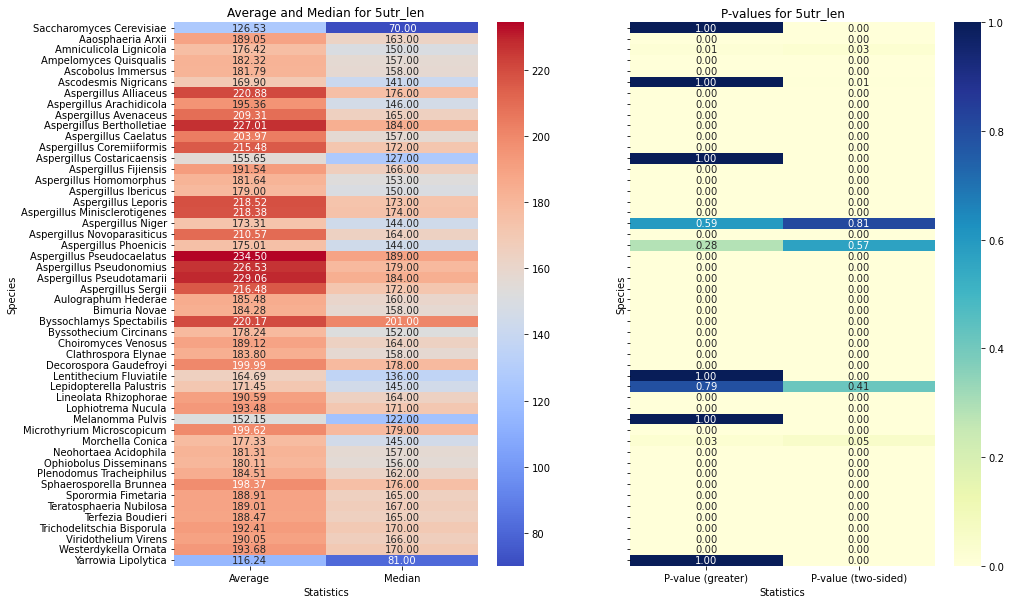

Statistics for 3utr_len
                      Species Average Median P-value (greater) P-value (two-sided)
     Saccharomyces Cerevisiae  164.19 126.00            1.0000              0.0000
            Aaosphaeria Arxii  192.71 173.00            0.0000              0.0000
       Amniculicola Lignicola  189.79 167.00            0.0001              0.0001
       Ampelomyces Quisqualis  199.69 179.00            0.0000              0.0000
           Ascobolus Immersus  192.23 171.00            0.0000              0.0000
         Ascodesmis Nigricans  188.44 165.00            0.0041              0.0082
        Aspergillus Alliaceus  234.75 193.00            0.0000              0.0000
     Aspergillus Arachidicola  217.00 177.00            0.0000              0.0000
        Aspergillus Avenaceus  209.34 169.00            0.0000              0.0000
    Aspergillus Bertholletiae  223.99 182.00            0.0000              0.0000
         Aspergillus Caelatus  210.00 172.00            0.0000 

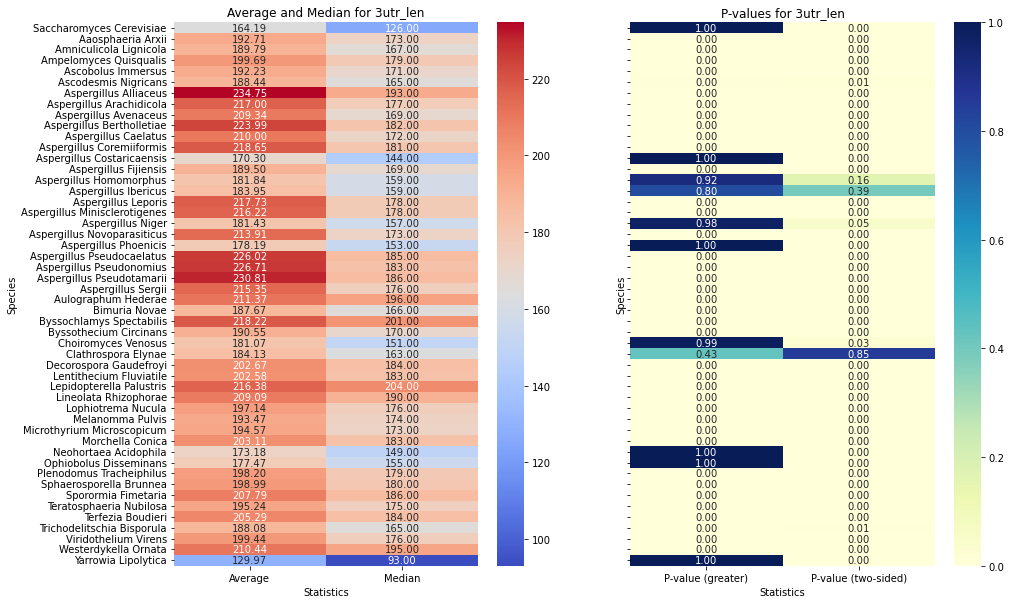

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate group median for each DataFrame
group_medians = {df_name: new_dataframes[df_name].median().median() for df_name in ['cds_len', '5utr_len', '3utr_len']}

for df_name in ['cds_len', '5utr_len', '3utr_len']:
    print(f"Statistics for {df_name}\n{'='*30}")
    
    df = new_dataframes[df_name]
    group_median = group_medians[df_name]
    
    # Calculate statistics
    statistics = []
    for col in df.columns:
        # Exclude NaN values
        sample = df[col].dropna()
        
        # Compute Wilcoxon signed-rank test
        _, pvalue_greater = wilcoxon(sample - group_median, alternative='greater')  # One-tailed test
        _, pvalue_two_sided = wilcoxon(sample - group_median, alternative='two-sided')  # Two-tailed test

        # Update species names: replace underscore with space, capitalize every word
        species_name = col.replace('_', ' ').title()
        
        # Append species, average, median and p-values to statistics
        statistics.append([species_name, f"{sample.mean():.2f}", f"{sample.median():.2f}", f"{pvalue_greater:.4f}", f"{pvalue_two_sided:.4f}"])
    
    # Create a DataFrame and display as a table
    df_statistics = pd.DataFrame(statistics, columns=['Species', 'Average', 'Median', 'P-value (greater)', 'P-value (two-sided)'])
    print(df_statistics.to_string(index=False))

    # Split the dataframe
    df1 = df_statistics.set_index('Species')[['Average', 'Median']].astype(float)
    df2 = df_statistics.set_index('Species')[['P-value (greater)', 'P-value (two-sided)']].astype(float)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10), sharey=True)

    # Create a heatmap from the DataFrame
    sns.heatmap(df1, annot=True, fmt=".2f", cmap='coolwarm', ax=ax1)
    sns.heatmap(df2, annot=True, fmt=".2f", cmap='YlGnBu', ax=ax2)
    
    # Add title and labels
    ax1.set_title(f'Average and Median for {df_name}')
    ax1.set_xlabel('Statistics')
    ax2.set_title(f'P-values for {df_name}')
    ax2.set_xlabel('Statistics')
    
    plt.show()


Statistics for cds_len
                      Species Average  Median P-value (greater) P-value (two-sided)
     Saccharomyces Cerevisiae 1500.98 1244.00            0.0000              0.0000
            Aaosphaeria Arxii 1317.38 1094.00            0.0000              0.0000
       Amniculicola Lignicola 1300.74 1038.00            0.0000              0.0000
       Ampelomyces Quisqualis 1303.97 1046.00            0.0000              0.0000
           Ascobolus Immersus 1256.53  993.00            0.2001              0.4002
         Ascodesmis Nigricans 1225.96  935.00            0.9986              0.0028
        Aspergillus Alliaceus 1297.74 1076.00            0.0000              0.0000
     Aspergillus Arachidicola 1279.17 1074.00            0.0000              0.0000
        Aspergillus Avenaceus 1395.55 1182.00            0.0000              0.0000
    Aspergillus Bertholletiae 1317.69 1113.00            0.0000              0.0000
         Aspergillus Caelatus 1320.99 1118.00        

Statistics for 3utr_len
                      Species Average Median P-value (greater) P-value (two-sided)
     Saccharomyces Cerevisiae  164.19 126.00            1.0000              0.0000
            Aaosphaeria Arxii  192.71 173.00            0.0000              0.0000
       Amniculicola Lignicola  189.79 167.00            0.0001              0.0001
       Ampelomyces Quisqualis  199.69 179.00            0.0000              0.0000
           Ascobolus Immersus  192.23 171.00            0.0000              0.0000
         Ascodesmis Nigricans  188.44 165.00            0.0041              0.0082
        Aspergillus Alliaceus  234.75 193.00            0.0000              0.0000
     Aspergillus Arachidicola  217.00 177.00            0.0000              0.0000
        Aspergillus Avenaceus  209.34 169.00            0.0000              0.0000
    Aspergillus Bertholletiae  223.99 182.00            0.0000              0.0000
         Aspergillus Caelatus  210.00 172.00            0.0000 

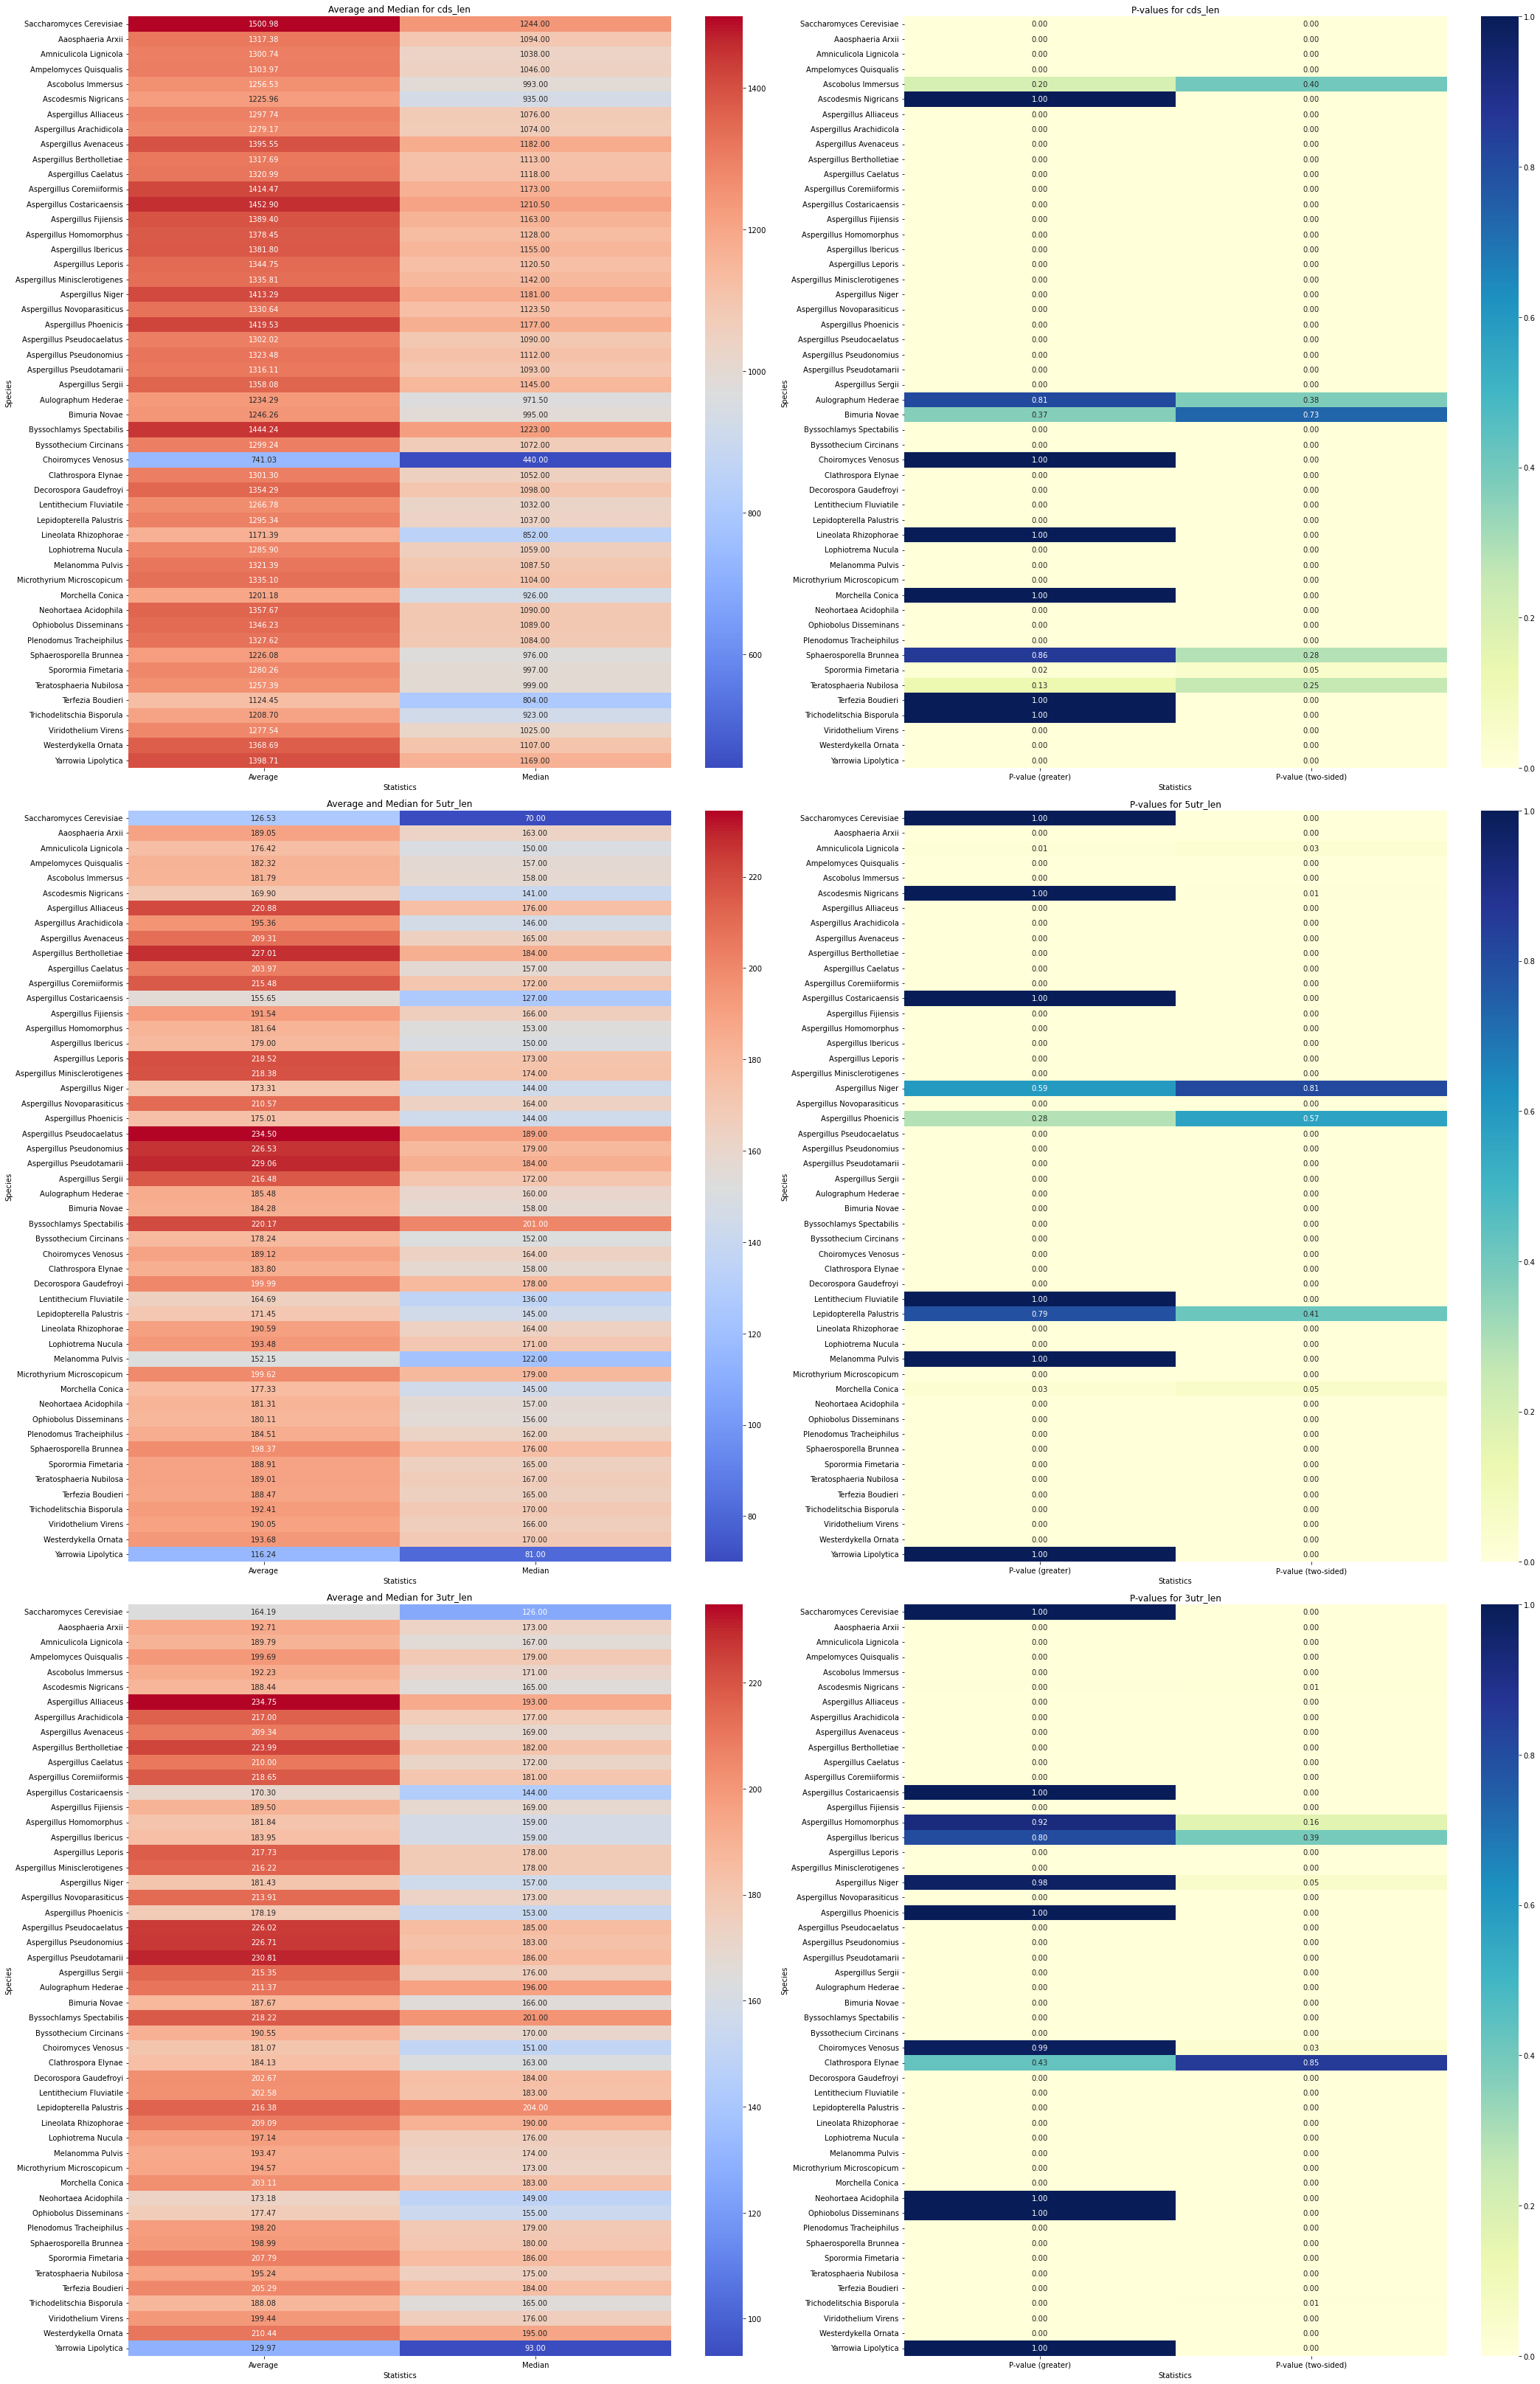

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Calculate group median for each DataFrame
group_medians = {df_name: new_dataframes[df_name].median().median() for df_name in ['cds_len', '5utr_len', '3utr_len']}

# Create a figure and gridspec
fig = plt.figure(figsize=(30, 45))  # Adjust figure size to accommodate all subplots
gs = gridspec.GridSpec(3, 2)  # Adjust for 3 rows of subplots

for i, df_name in enumerate(['cds_len', '5utr_len', '3utr_len']):
    print(f"Statistics for {df_name}\n{'='*30}")
    
    df = new_dataframes[df_name]
    group_median = group_medians[df_name]
    
    # Calculate statistics
    statistics = []
    for col in df.columns:
        # Exclude NaN values
        sample = df[col].dropna()
        
        # Compute Wilcoxon signed-rank test
        _, pvalue_greater = wilcoxon(sample - group_median, alternative='greater')  # One-tailed test
        _, pvalue_two_sided = wilcoxon(sample - group_median, alternative='two-sided')  # Two-tailed test

        # Update species names: replace underscore with space, capitalize every word
        species_name = col.replace('_', ' ').title()
        
        # Append species, average, median and p-values to statistics
        statistics.append([species_name, f"{sample.mean():.2f}", f"{sample.median():.2f}", f"{pvalue_greater:.4f}", f"{pvalue_two_sided:.4f}"])
    
    # Create a DataFrame and display as a table
    df_statistics = pd.DataFrame(statistics, columns=['Species', 'Average', 'Median', 'P-value (greater)', 'P-value (two-sided)'])
    print(df_statistics.to_string(index=False))

    # Split the dataframe
    df1 = df_statistics.set_index('Species')[['Average', 'Median']].astype(float)
    df2 = df_statistics.set_index('Species')[['P-value (greater)', 'P-value (two-sided)']].astype(float)
    
    # Define axes for the heatmaps
    ax1 = plt.subplot(gs[i, 0])
    ax2 = plt.subplot(gs[i, 1])

    # Create a heatmap from the DataFrame
    sns.heatmap(df1, annot=True, fmt=".2f", cmap='coolwarm', ax=ax1)
    sns.heatmap(df2, annot=True, fmt=".2f", cmap='YlGnBu', ax=ax2)
    
    # Add title and labels
    ax1.set_title(f'Average and Median for {df_name}')
    ax1.set_xlabel('Statistics')
    ax2.set_title(f'P-values for {df_name}')
    ax2.set_xlabel('Statistics')

# Show the figure with all subplots
plt.tight_layout()  # Adjusts subplot params so that subplots fit in the figure area
plt.show()


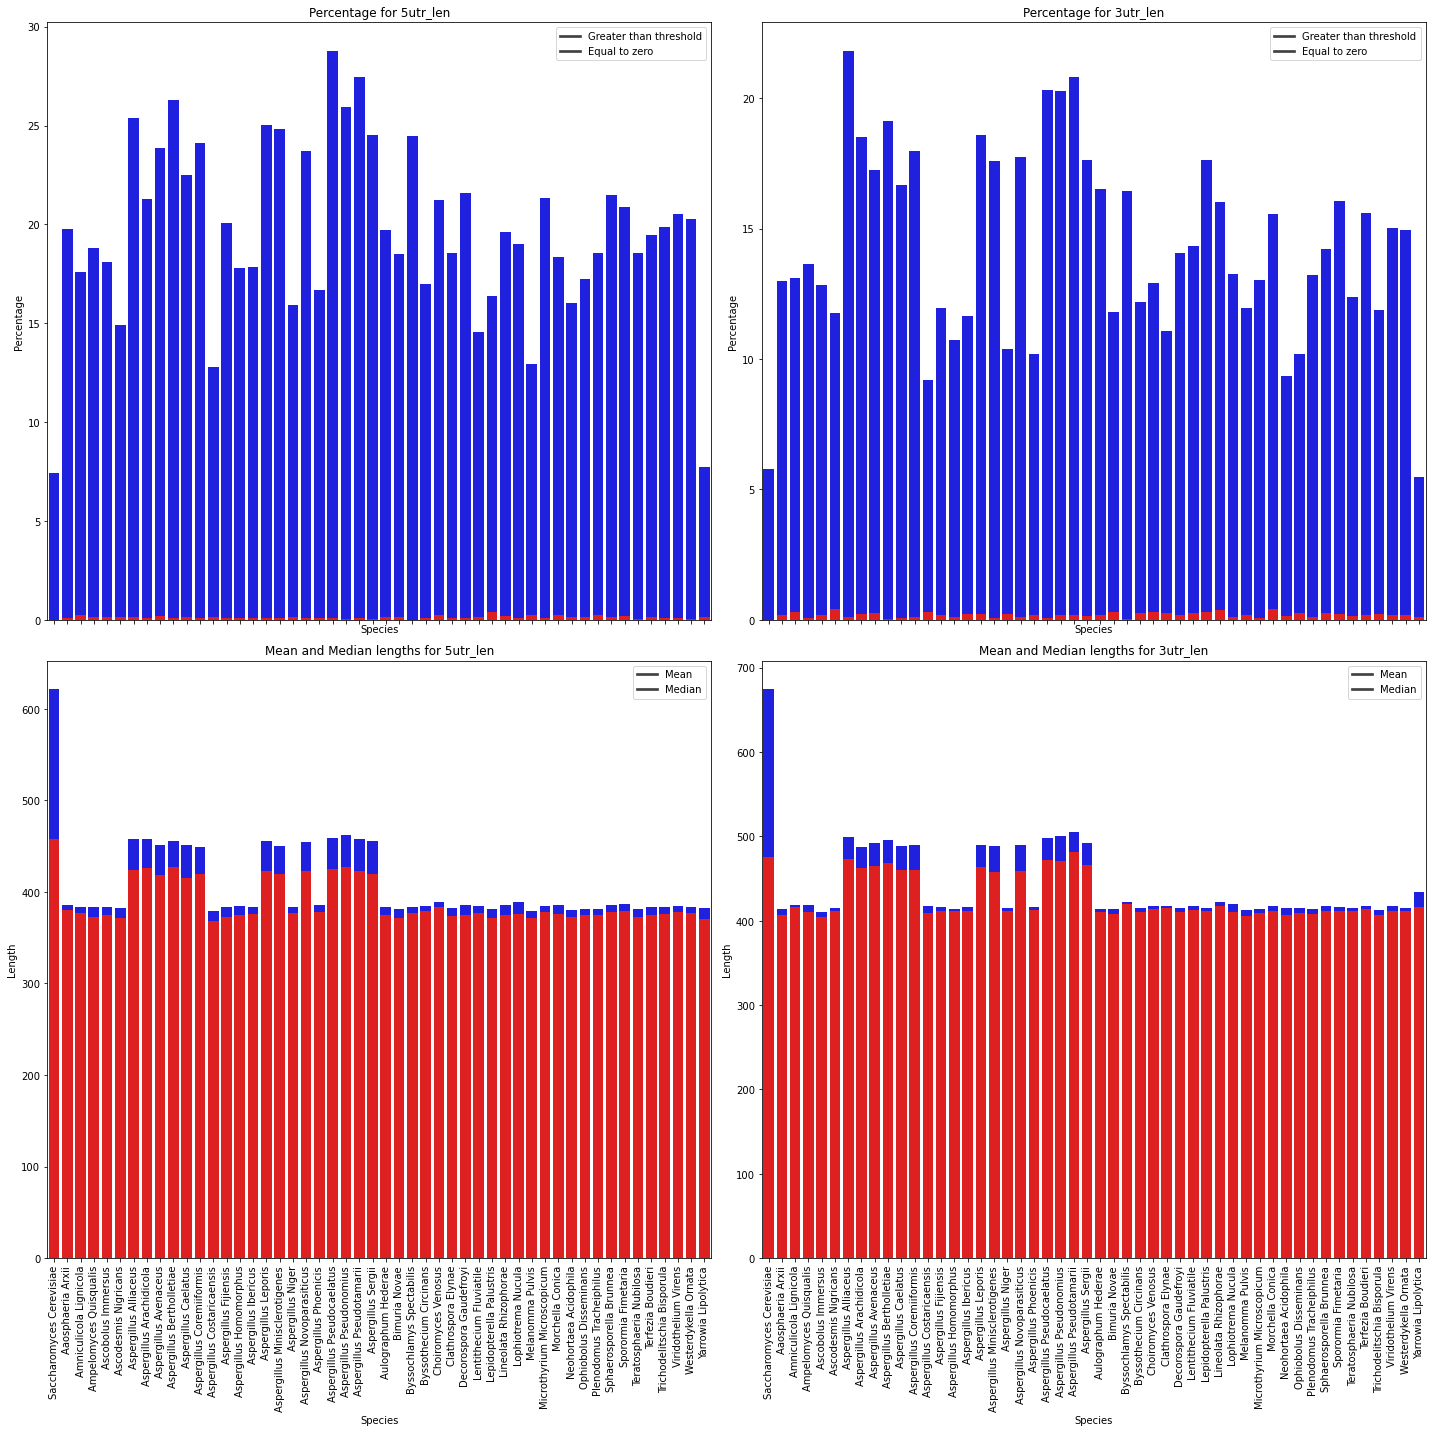

In [48]:
import numpy as np

df_names = ['5utr_len', '3utr_len']
thresholds = [300, 350]
percentage_tables = []
summary_tables = []

for df_name, threshold in zip(df_names, thresholds):
    df = new_dataframes[df_name]
    
    # Calculate percentage
    percentage_greater = (df > threshold).sum() / df.count() * 100
    percentage_zero = (df == 0).sum() / df.count() * 100
    
    percentage_greater = percentage_greater.reset_index()
    percentage_zero = percentage_zero.reset_index()
    
    percentage_greater.columns = ['Species', 'Percentage (greater than threshold)']
    percentage_zero.columns = ['Species', 'Percentage (equal to zero)']
    
    percentage = pd.merge(percentage_greater, percentage_zero, on='Species')
    
    percentage['Species'] = percentage['Species'].str.replace('_', ' ').str.title()
    
    percentage_tables.append(percentage)

    # Calculate mean and median of entries above threshold
    mean_above_threshold = df[df > threshold].mean()
    median_above_threshold = df[df > threshold].median()
    
    summary = pd.DataFrame({'Species': df.columns, 
                            'Mean (greater than threshold)': mean_above_threshold, 
                            'Median (greater than threshold)': median_above_threshold})
    summary['Species'] = summary['Species'].str.replace('_', ' ').str.title()
    
    summary_tables.append(summary)

fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True)

for ax_row, percentage, summary, df_name in zip(axes.T, percentage_tables, summary_tables, df_names):
    sns.barplot(data=percentage, x="Species", y="Percentage (greater than threshold)", ax=ax_row[0], color='b')
    sns.barplot(data=percentage, x="Species", y="Percentage (equal to zero)", ax=ax_row[0], color='r')
    ax_row[0].set_title(f'Percentage for {df_name}')
    ax_row[0].set_ylabel('Percentage')
    ax_row[0].legend(['Greater than threshold', 'Equal to zero'], loc='upper right')

    sns.barplot(data=summary, x="Species", y="Mean (greater than threshold)", ax=ax_row[1], color='b')
    sns.barplot(data=summary, x="Species", y="Median (greater than threshold)", ax=ax_row[1], color='r')
    ax_row[1].set_title(f'Mean and Median lengths for {df_name}')
    ax_row[1].set_ylabel('Length')
    ax_row[1].legend(['Mean', 'Median'], loc='upper right')

    for ax in ax_row:
        ax.set_xlabel('Species')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
